In [1]:
from sys import stdout

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# generating data
def generate_class0(n=500):
    return np.random.multivariate_normal([1, 0], [[1, 0.75], [0.75, 1]], n)
def generate_class1(n=500):
    return np.random.multivariate_normal([0, 1.5], [[1, 0.75], [0.75, 1]], n)

x_train = np.concatenate((generate_class0(), generate_class1()))
y_train = np.concatenate((np.zeros(500), np.ones(500)))

x_test = np.concatenate((generate_class0(), generate_class1()))
y_test = np.concatenate((np.zeros(500), np.ones(500)))

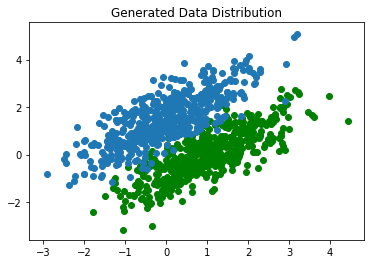

In [3]:
plt.scatter(x_train[y_train == 0][:, 0], x_train[y_train == 0][:, 1], c='g')
plt.scatter(x_train[y_train == 1][:, 0], x_train[y_train == 1][:, 1])
_ = plt.title("Generated Data Distribution")

In [4]:
# helper functions

def plot_decision_boundry(weights, x, y):
    """plots decision boundry from weights with data"""
    
    
    # generate data to plot line
    xaxis = np.linspace(-3, 4, 1000)
    yaxis = (-weights[0] - weights[1] * xaxis) / weights[2]

    plt.plot(xaxis, yaxis, c='orange')
    plt.scatter(x[y == 0][:, 0], x[y == 0][:, 1], c='g')
    plt.scatter(x[y == 1][:, 0], x[y == 1][:, 1])
    
    _ = plt.title("Trained Decision Boundry")

def plot_loss(loss):
    """plots the loss w.r.t. iterations"""
    plt.plot(loss)
    
    _ = plt.title("Iterations vs Loss")
    
def plot_norms(norms):
    """plots the norms w.r.t. iterations"""
    plt.plot(norms)
    
    _ = plt.title("Iterations vs Gradient Norm")

# logistic regression implementation

In [5]:
class MyLogisticRegression():
    def __init__(self, max_iter=100000, threshold=0.001):
        self.max_iter = max_iter
        self.threshold = threshold
        
        # iteration count
        self.iter = 0
        
        # cross entropy training error w.r.t iteration
        self.losses = []
        
        # norm of gradient w.r.t. iteration
        self.norms = []
        
    def add_intercept_axis(self, x):
        """basically add 1 in axis 1 for numpy broadcasting"""
        ones = np.ones((x.shape[0], 1))
        return np.concatenate((ones, x), axis=1)
        
    def probability(self, x):
        """adds intercept axis and predicts probability with weights and sigmoid function"""
        x = self.add_intercept_axis(x)
        return self.sigmoid(np.dot(x, self.weights))
    
    def predict(self, x, threshold=0.5):
        """uses probability function to predict class on threshold"""
        return self.probability(x) >= threshold
    
    def loss_function(self, output, y):
        """Cross-entropy loss function"""
        return (-y * np.log(output) - (1 - y) * np.log(1 - output)).mean()
    
    def sigmoid(self, net):
        """sigmoid activation function"""
        return 1 / (1 + np.exp(-net))
    
    def accuracy(self, x, y):
        """returns accuracy of the model"""
        return np.count_nonzero(my_LR.predict(x_test) == y_train) / y.size
    
    def fit(self, x, y, lr=0.1):
        """
        Batch Training function
        
        (x, y) - training data and labels
        
        lr - learning rate, def: 0.1
        """
        
        # reset variables
        self.iter = 0
        self.losses = []
        self.norms = []
        
        # add intercept axis
        x = self.add_intercept_axis(x)
        
        # initial weights [intercept, b0, b1]
        self.weights = np.zeros(3)
        
        # convergence var
        norm = 1
        
        while norm > self.threshold and self.iter < self.max_iter:
            # forward pass
            net = np.dot(x, self.weights)
            output = self.sigmoid(net)
            
            # calculate gradient
            gradient = np.dot(x.T, (output - y)) / len(y)
            
            # update weights
            self.weights -= lr * gradient
            
            # calculate norm & loss
            norm = np.abs(gradient).sum()
            self.norms.append(norm)
            
            self.losses.append(self.loss_function(output, y))
            
            self.iter += 1
        
    def fit_online(self, x, y, lr=0.1, debug=False):
        """
        Online training function
        
        (x, y) - training data and labels
        
        lr - learning rate, def: 0.1
        """
        
        
        # reset variables
        self.iter = 0
        self.losses = []
        self.norms = []
        
        # initial weights [intercept, b0, b1]
        self.weights = np.zeros(3)
        
        # convergence var
        norm = 1
        
        # batch training
        while norm > self.threshold and self.iter < self.max_iter:
            
            for xi, yi in zip(x, y):
                # compute output
                net = self.weights[0] + self.weights[1] * xi[0] + self.weights[2] * xi[1]
                
                # activate net with sigmoid
                output = self.sigmoid(net)
                
                # calculate gradient
                gradient = (output - yi) * (np.concatenate((np.array([1]), xi))) 

                # update weights
                self.weights -= lr * gradient                
            
                # recalculate norm
                norm = np.abs(gradient).sum()
                self.norms.append(norm)

                # add and save loss
                self.losses.append(self.loss_function(output, y))
            
                self.iter += 1
                
                # convergence condition
                if norm < self.threshold or self.iter > self.max_iter:
                    break

                if debug and (self.iter % 2500) == 0:
                    stdout.flush()
                    print(f'\r{self.iter}: gradient: {gradient}, weights: {self.weights}, norm: {norm}')
        

In [6]:
my_LR = MyLogisticRegression()

# batch training and results



LEARNING RATE: 1


Took 1013 iterations with accuracy of 0.968



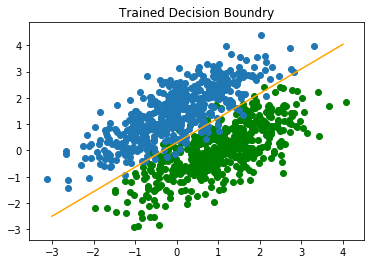

In [7]:
print(f"\n\nLEARNING RATE: {1}\n")
my_LR.fit(x_train, y_train, lr=1)

print(f"\nTook {my_LR.iter} iterations with accuracy of {my_LR.accuracy(x_test, y_test)}\n")

plot_decision_boundry(my_LR.weights, x_test, y_test)

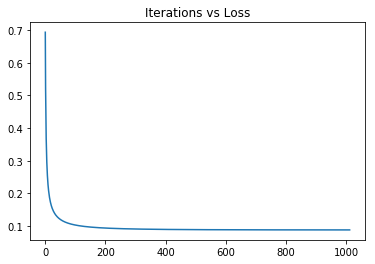

In [8]:
plot_loss(my_LR.losses)

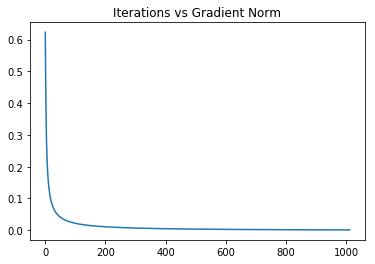

In [9]:
plot_norms(my_LR.norms)



LEARNING RATE: 0.1


Took 10145 iterations with accuracy of 0.968



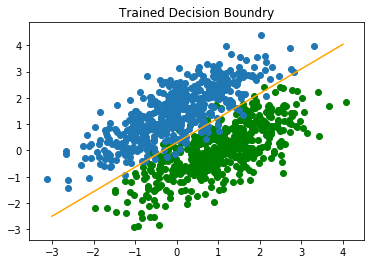

In [10]:
print(f"\n\nLEARNING RATE: 0.1\n")
my_LR.fit(x_train, y_train, lr=0.1)

print(f"\nTook {my_LR.iter} iterations with accuracy of {my_LR.accuracy(x_test, y_test)}\n")

plot_decision_boundry(my_LR.weights, x_test, y_test)

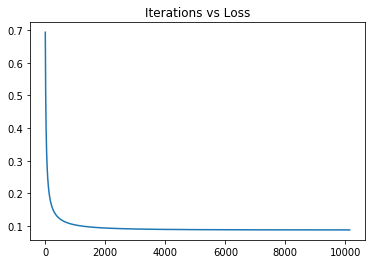

In [11]:
plot_loss(my_LR.losses)

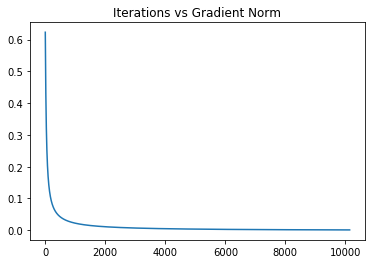

In [12]:
plot_norms(my_LR.norms)



LEARNING RATE: 0.01


Took 100000 iterations with accuracy of 0.968



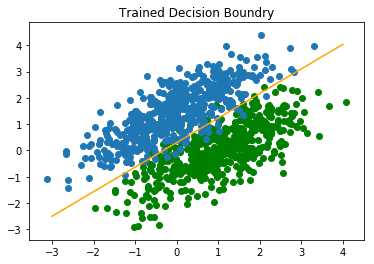

In [13]:
print(f"\n\nLEARNING RATE: 0.01\n")
my_LR.fit(x_train, y_train, lr=0.01)

print(f"\nTook {my_LR.iter} iterations with accuracy of {my_LR.accuracy(x_test, y_test)}\n")

plot_decision_boundry(my_LR.weights, x_test, y_test)

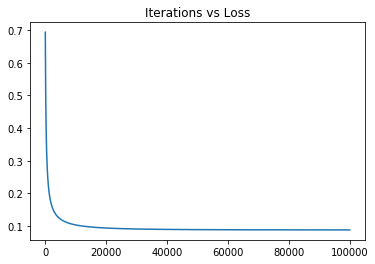

In [14]:
plot_loss(my_LR.losses)

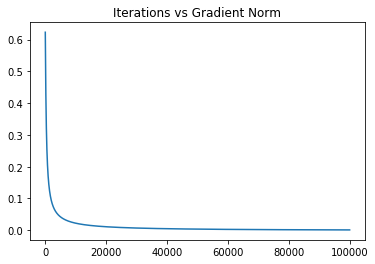

In [15]:
plot_norms(my_LR.norms)



LEARNING RATE: 0.001


Took 100000 iterations with accuracy of 0.968



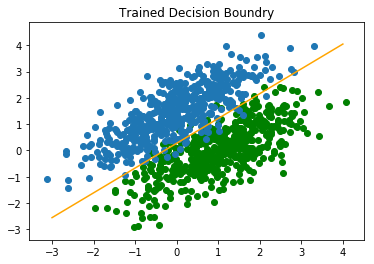

In [16]:
print(f"\n\nLEARNING RATE: 0.001\n")
my_LR.fit(x_train, y_train, lr=0.001)

print(f"\nTook {my_LR.iter} iterations with accuracy of {my_LR.accuracy(x_test, y_test)}\n")

plot_decision_boundry(my_LR.weights, x_test, y_test)

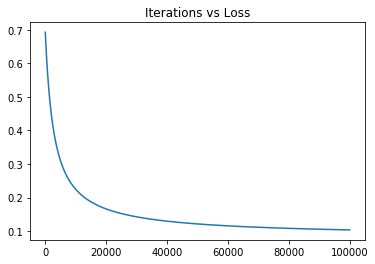

In [17]:
plot_loss(my_LR.losses)

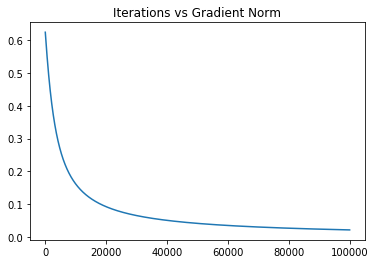

In [18]:
plot_norms(my_LR.norms)

# online training and results



LEARNING RATE: 1


Took 65 iterations with accuracy of 0.515



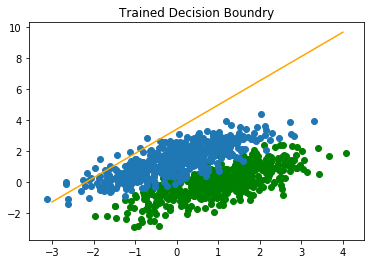

In [19]:
print(f"\n\nLEARNING RATE: 1\n")
my_LR.fit_online(x_train, y_train, lr=1)

print(f"\nTook {my_LR.iter} iterations with accuracy of {my_LR.accuracy(x_test, y_test)}\n")

plot_decision_boundry(my_LR.weights, x_test, y_test)

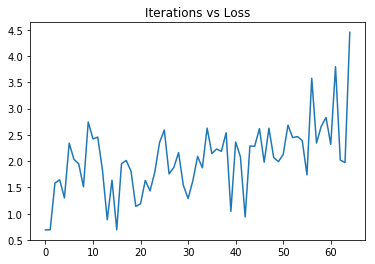

In [20]:
plot_loss(my_LR.losses)

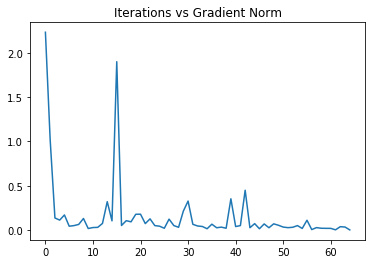

In [21]:
plot_norms(my_LR.norms)



LEARNING RATE: 0.1


Took 698 iterations with accuracy of 0.933



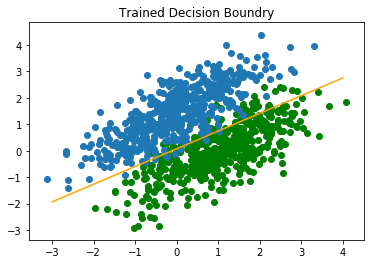

In [22]:
print(f"\n\nLEARNING RATE: 0.1\n")
my_LR.fit_online(x_train, y_train, lr=0.1)

print(f"\nTook {my_LR.iter} iterations with accuracy of {my_LR.accuracy(x_test, y_test)}\n")

plot_decision_boundry(my_LR.weights, x_test, y_test)

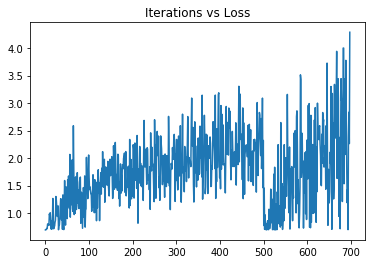

In [23]:
plot_loss(my_LR.losses)

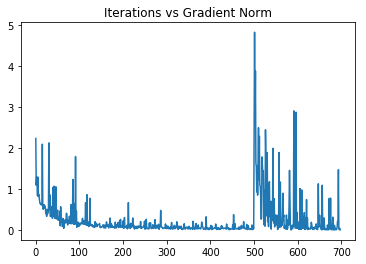

In [24]:
plot_norms(my_LR.norms)



LEARNING RATE: 0.01


Took 3910 iterations with accuracy of 0.959



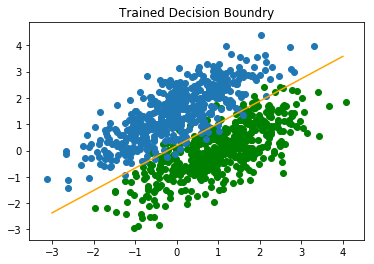

In [25]:
print(f"\n\nLEARNING RATE: 0.01\n")
my_LR.fit_online(x_train, y_train, lr=0.01)

print(f"\nTook {my_LR.iter} iterations with accuracy of {my_LR.accuracy(x_test, y_test)}\n")

plot_decision_boundry(my_LR.weights, x_test, y_test)

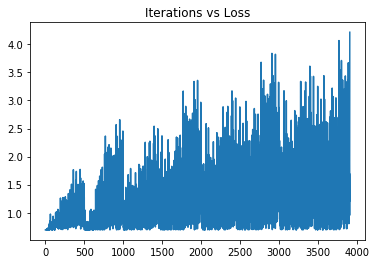

In [26]:
plot_loss(my_LR.losses)

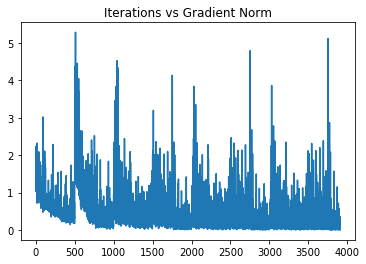

In [27]:
plot_norms(my_LR.norms)



LEARNING RATE: 0.001


Took 44910 iterations with accuracy of 0.967



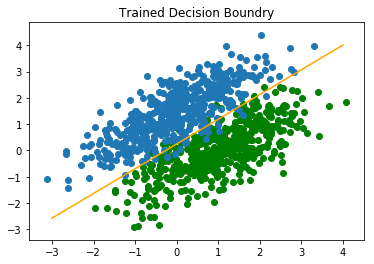

In [28]:
print(f"\n\nLEARNING RATE: 0.001\n")
my_LR.fit_online(x_train, y_train, lr=0.001)

print(f"\nTook {my_LR.iter} iterations with accuracy of {my_LR.accuracy(x_test, y_test)}\n")

plot_decision_boundry(my_LR.weights, x_test, y_test)

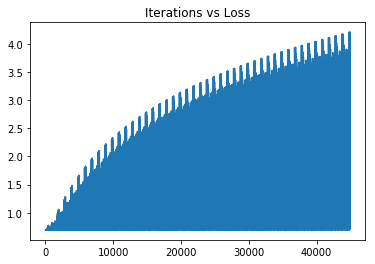

In [29]:
plot_loss(my_LR.losses)

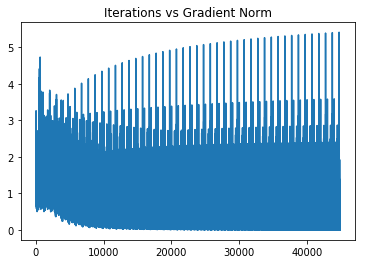

In [30]:
plot_norms(my_LR.norms)

# sklearn logistic regression for comparison

In [31]:
from sklearn.linear_model import SGDClassifier

In [32]:
model = SGDClassifier(max_iter=100000, tol=0.0001, loss='log')

In [33]:
model.fit(x_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=100000,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=0.0001,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [34]:
model.intercept_, model.coef_

(array([-1.17320431]), array([[-4.89932314,  6.25138703]]))

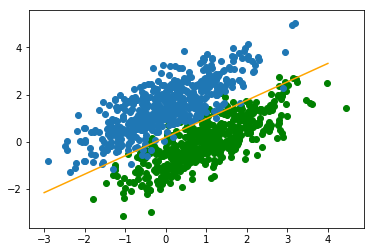

In [35]:
# generate data to plot line
xaxis = np.linspace(-3, 4, 1000)
yaxis = (-model.intercept_[0] - model.coef_[0][0] * xaxis) / model.coef_[0][1]

plt.plot(xaxis, yaxis, c='orange')
plt.scatter(x_train[y_train == 0][:, 0], x_train[y_train == 0][:, 1], c='g')
plt.scatter(x_train[y_train == 1][:, 0], x_train[y_train == 1][:, 1])